In [ ]:
!pip install numpy pandas scikit-learn matplotlib


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train = pd.read_csv("/content/sample_data/california_housing_train.csv")
test = pd.read_csv("/content/sample_data/california_housing_test.csv")

In [ ]:
import os

project_path = "/content/drive/MyDrive/Colab Notebooks"
os.makedirs(project_path, exist_ok=True)

In [ ]:
target_column = "median_house_value"


X_train = train.drop(columns=[target_column]).values
y_train = train[target_column].values

X_test = test.drop(columns=[target_column]).values
y_test = test[target_column].values

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

In [ ]:
theta_normal = np.linalg.pinv(X_train.T @ X_train) @ (X_train.T @ y_train)
y_pred_normal = X_test @ theta_normal

In [ ]:
def gradient_descent(X, y, lr=0.01, num_iters=1000, tol=1e-6):
    n, d = X.shape
    theta = np.zeros(d)
    losses = []

    for i in range(num_iters):
        y_pred = X @ theta
        error = y_pred - y
        grad = (1/n) * (X.T @ error)
        theta -= lr * grad

        loss = (1/(2*n)) * np.sum(error**2)
        losses.append(loss)

        if i > 0 and abs(losses[-2] - losses[-1]) < tol:
            break
    return theta, losses

theta_gd, losses = gradient_descent(X_train, y_train, lr=0.01, num_iters=1000)
y_pred_gd = X_test @ theta_gd


In [ ]:
from sklearn.linear_model import LinearRegression

# Train sklearn Linear Regression
model = LinearRegression()
model.fit(X_train[:,1:], y_train)  # sklearn automatically handles intercept
y_pred_sklearn = model.predict(X_test[:,1:])


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def evaluate(y_true, y_pred, name="Model"):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    print(f"{name} -> MSE: {mse:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}, MAE: {mae:.4f}")

print("📊 Model Comparison:")
evaluate(y_test, y_pred_normal, "Normal Equation")
evaluate(y_test, y_pred_gd, "Gradient Descent")
evaluate(y_test, y_pred_sklearn, "Scikit-learn")

📊 Model Comparison:
Normal Equation -> MSE: 4867205486.9289, RMSE: 69765.3602, R²: 0.6195, MAE: 50352.2283
Gradient Descent -> MSE: 5149828415.4103, RMSE: 71762.3050, R²: 0.5974, MAE: 51945.7413
Scikit-learn -> MSE: 4867205486.9289, RMSE: 69765.3602, R²: 0.6195, MAE: 50352.2283


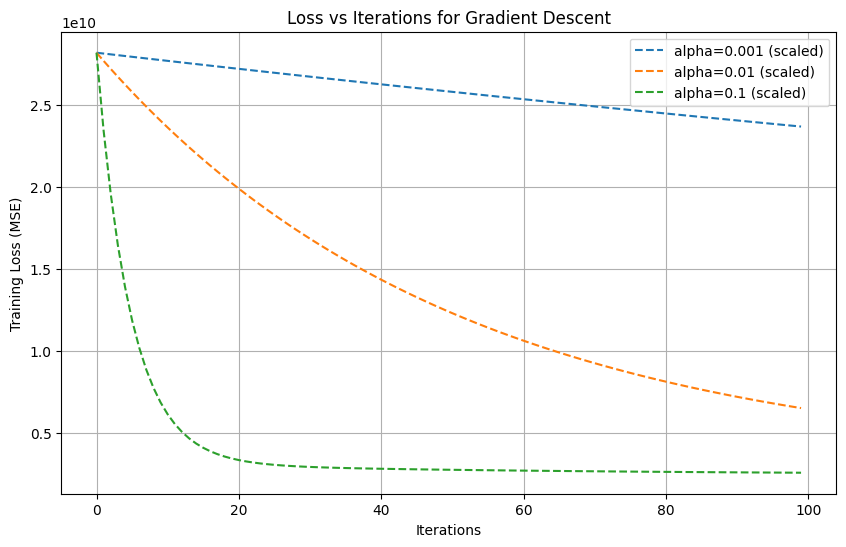

In [ ]:
import matplotlib.pyplot as plt

def gradient_descent(X, y, alpha=0.01, iterations=1000):
    m, n = X.shape
    theta = np.zeros(n)
    losses = []

    for i in range(iterations):
        y_pred = X @ theta
        error = y_pred - y
        loss = (1/(2*m)) * np.sum(error**2)
        losses.append(loss)

        grad = (1/m) * (X.T @ error)
        theta -= alpha * grad

    return theta, losses

# Try with scaled and unscaled data
alphas = [0.001, 0.01, 0.1]
plt.figure(figsize=(10,6))

# Note: X_train is already scaled from a previous cell
for alpha in alphas:
    _, losses = gradient_descent(X_train, y_train, alpha=alpha, iterations=100)
    plt.plot(losses, linestyle='--', label=f"alpha={alpha} (scaled)")

# The unscaled data is not available after the previous scaling step.
# If you want to plot for unscaled data, you would need to keep a separate copy of the unscaled X_train.
# For now, I will comment out the unscaled data plotting as it's not possible with the current variables.
# for alpha in alphas:
#     _, losses = gradient_descent(X_train_unscaled, y_train, alpha=alpha, iterations=100)
#     plt.plot(losses, label=f"alpha={alpha} (unscaled)")


plt.xlabel("Iterations")
plt.ylabel("Training Loss (MSE)")
plt.title("Loss vs Iterations for Gradient Descent")
plt.legend()
plt.grid(True)
plt.savefig("loss_vs_iterations.png")
plt.show()

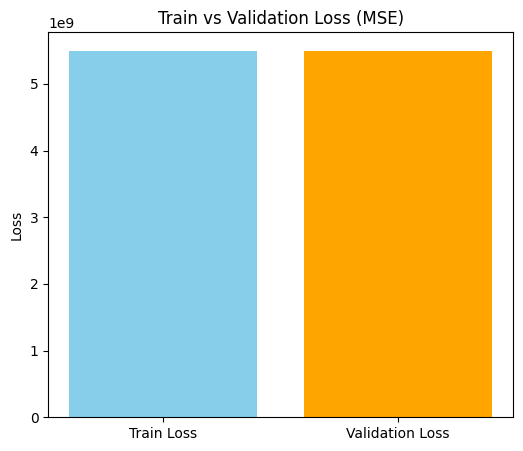

In [ ]:
# Predictions from gradient descent (scaled version)
theta_gd, losses = gradient_descent(X_train, y_train, alpha=0.01, iterations=500)
y_train_pred = X_train @ theta_gd
y_test_pred = X_test @ theta_gd

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

plt.figure(figsize=(6,5))
plt.bar(["Train Loss", "Validation Loss"], [train_mse, test_mse], color=["skyblue", "orange"])
plt.title("Train vs Validation Loss (MSE)")
plt.ylabel("Loss")
plt.savefig("validation_loss.png")
plt.show()

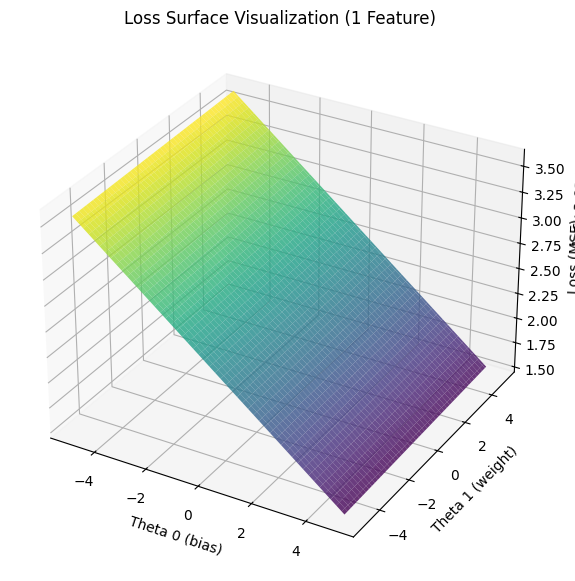

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Select 1 feature for visualization (say first feature of X_train_scaled)
X_vis = X_train[:, [1]]  # Select a feature (excluding the bias term at index 0)
X_vis = np.c_[np.ones(X_vis.shape[0]), X_vis]  # add bias
y_vis = y_train

# Grid banani hai theta0 (bias) aur theta1 ke liye
theta0_vals = np.linspace(-5, 5, 100)
theta1_vals = np.linspace(-5, 5, 100)

loss_surface = np.zeros((len(theta0_vals), len(theta1_vals)))

for i, t0 in enumerate(theta0_vals):
    for j, t1 in enumerate(theta1_vals):
        theta_temp = np.array([t0, t1])
        y_pred = X_vis @ theta_temp
        loss_surface[i,j] = np.mean((y_pred - y_vis)**2) / 2

# 3D Plot
T0, T1 = np.meshgrid(theta0_vals, theta1_vals)

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(T0, T1, loss_surface.T, cmap="viridis", alpha=0.8)
ax.set_xlabel("Theta 0 (bias)")
ax.set_ylabel("Theta 1 (weight)")
ax.set_zlabel("Loss (MSE)")
plt.title("Loss Surface Visualization (1 Feature)")
plt.savefig("loss_surface.png")
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

def evaluation_metrics(y_true, y_pred, method_name="Model"):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)

    print(f"{method_name} Results")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"R² Score: {r2:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print("-"*50)

    return mse, rmse, r2, mae

# Evaluate all 3 models
metrics_normal = evaluation_metrics(y_test, y_pred_normal, "Normal Equation")
metrics_gd = evaluation_metrics(y_test, y_pred_gd, "Gradient Descent")
metrics_sklearn = evaluation_metrics(y_test, y_pred_sklearn, "Scikit-learn LinearRegression")


Normal Equation Results
Mean Squared Error (MSE): 4867205486.9289
Root Mean Squared Error (RMSE): 69765.3602
R² Score: 0.6195
Mean Absolute Error (MAE): 50352.2283
--------------------------------------------------
Gradient Descent Results
Mean Squared Error (MSE): 5149828415.4103
Root Mean Squared Error (RMSE): 71762.3050
R² Score: 0.5974
Mean Absolute Error (MAE): 51945.7413
--------------------------------------------------
Scikit-learn LinearRegression Results
Mean Squared Error (MSE): 4867205486.9289
Root Mean Squared Error (RMSE): 69765.3602
R² Score: 0.6195
Mean Absolute Error (MAE): 50352.2283
--------------------------------------------------
